
# Proyecto: Camino más corto en un laberinto

En este proyecto se utiliza la librería [baile](https://github.com/kyriox/baile) para resolver el problema del **camino más corto en un laberinto** utilizando algoritmos de búsqueda no informada (BFS, DFS) e informada (A*).

Se definen:
- **Estado**: una posición `(x, y)` dentro del laberinto.
- **Sucesores**: posiciones vecinas a las que el agente puede moverse (arriba, abajo, izquierda, derecha), siempre que no sean paredes.
- **Meta**: alcanzar la posición objetivo `(x_goal, y_goal)`.
- **Heurística**: distancia Manhattan entre la posición actual y la meta.

Finalmente, se comparan los resultados en cuanto a tiempo, nodos expandidos y calidad de la solución.

# IDEA DE PROYECTO
Queremos encontrar el camino más corto en un laberinto usando algoritmos de búsqueda:

BFS → búsqueda no informada (nivel por nivel)

DFS → búsqueda no informada (profundidad)

A* → búsqueda informada con heurística (distancia Manhattan)

Para esto necesitamos:

Una clase que represente el problema del laberinto.

Algoritmos de búsqueda que puedan trabajar con esa clase.

Comparar resultados y mostrar el camino.

# 1. Clona tu fork:

In [1]:
!git clone https://github.com/perlapaola22/baileProyecto   #PARA CLONAR EL REPOSITORIO


fatal: destination path 'baileProyecto' already exists and is not an empty directory.


# 2. agregar carpeta src/ del fork al sys.path

In [25]:


import sys
sys.path.append("/home/paola/IA/baileProyecto/src")  # AGREGAR SRC AL PATH


**para ver que hay en SimpleSearch.py**


In [30]:
import SimpleSearch
dir(SimpleSearch)


['BlindSearch',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'heapq',
 'node']

**Verificar que funciona:**


In [2]:
import baile
print(baile.__version__ if hasattr(baile, "__version__") else "baile cargado correctamente")


baile cargado correctamente


**CREAR PROYECTO DE LABERINTO:**

In [9]:
!python3 laberintoSolver.py


python3: can't open file '/home/paola/IA/laberintoSolver.py': [Errno 2] No such file or directory


In [10]:
# Representación del laberinto
# 0 = libre, 1 = pared
laberinto = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

inicio = (0,0)
meta = (4,4)


In [11]:
class LaberintoProblem:
    def __init__(self, laberinto, inicio, meta):
        self.laberinto = laberinto
        self.inicio = inicio
        self.meta = meta
        self.movs = [(-1,0),(1,0),(0,-1),(0,1)]  # Arriba, abajo, izquierda, derecha

    def acciones(self, estado):
        x, y = estado
        return [(x+dx, y+dy) for dx, dy in self.movs
                if 0 <= x+dx < len(self.laberinto)
                and 0 <= y+dy < len(self.laberinto[0])
                and self.laberinto[x+dx][y+dy] == 0]

    def es_meta(self, estado):
        return estado == self.meta


In [12]:
from collections import deque

def bfs(problem):
    queue = deque([problem.inicio])
    visitados = {problem.inicio: None}

    while queue:
        actual = queue.popleft()
        if problem.es_meta(actual):
            break
        for vecino in problem.acciones(actual):
            if vecino not in visitados:
                visitados[vecino] = actual
                queue.append(vecino)

    # Reconstruir el camino
    camino = []
    nodo = problem.meta
    while nodo:
        camino.append(nodo)
        nodo = visitados[nodo]
    camino.reverse()
    return camino


In [13]:
problema = LaberintoProblem(laberinto, inicio, meta)
camino = bfs(problema)

# Visualización simple
for i in range(len(laberinto)):
    for j in range(len(laberinto[0])):
        if (i,j) == inicio:
            print("S", end=" ")
        elif (i,j) == meta:
            print("G", end=" ")
        elif (i,j) in camino:
            print("*", end=" ")
        elif laberinto[i][j] == 1:
            print("#", end=" ")
        else:
            print(".", end=" ")
    print()



S # . . . 
* # . # . 
* * * # . 
# # * * * 
. . . # G 


/tmp/ipykernel_937/2042618080.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)


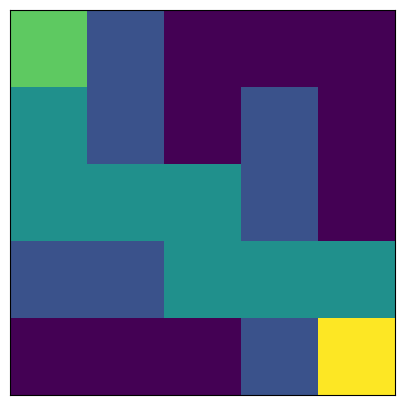

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Convertimos el laberinto a un array de numpy
lab_array = np.array(laberinto)

# Creamos una copia para marcar el camino
lab_vis = lab_array.copy()

# Marcamos el camino con un valor distinto (2)
for x, y in camino:
    lab_vis[x, y] = 2

# Marcamos inicio y meta
lab_vis[inicio] = 3
lab_vis[meta] = 4

# Definimos un mapa de colores: 0=blanco, 1=negro, 2=verde (camino), 3=azul (inicio), 4=rojo (meta)
cmap = plt.cm.get_cmap('viridis', 5)

plt.figure(figsize=(5,5))
plt.imshow(lab_vis, cmap=cmap, origin='upper')
plt.xticks([])  # quitar ejes
plt.yticks([])
plt.show()


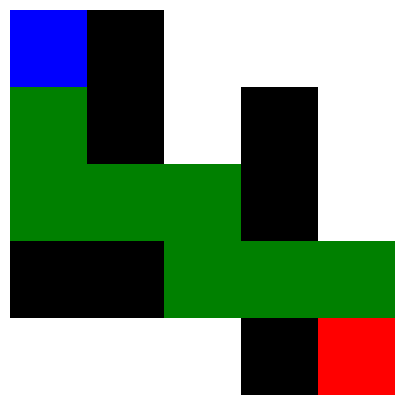

In [15]:
plt.figure(figsize=(5,5))
for i in range(len(laberinto)):
    for j in range(len(laberinto[0])):
        color = 'white'
        if (i,j) == inicio:
            color = 'blue'
        elif (i,j) == meta:
            color = 'red'
        elif laberinto[i][j] == 1:
            color = 'black'
        elif (i,j) in camino:
            color = 'green'
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, facecolor=color))
plt.xlim(0, len(laberinto[0]))
plt.ylim(0, len(laberinto))
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()
